In [1]:
import torch
import torchvision.transforms as tvt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
import struct
import os
from dataclass import PatchedDatasetTensor

In [2]:
# https://stackoverflow.com/questions/48809433/read-pfm-format-in-python
def read_pfm(filename):
    with Path(filename).open('rb') as pfm_file:

        line1, line2, line3 = (pfm_file.readline().decode('latin-1').strip() for _ in range(3))
        assert line1 in ('PF', 'Pf')
        
        channels = 3 if "PF" in line1 else 1
        width, height = (int(s) for s in line2.split())
        scale_endianess = float(line3)
        bigendian = scale_endianess > 0
        scale = abs(scale_endianess)

        buffer = pfm_file.read()
        samples = width * height * channels
        assert len(buffer) == samples * 4
        
        fmt = f'{"<>"[bigendian]}{samples}f'
        decoded = struct.unpack(fmt, buffer)
        shape = (height, width, 3) if channels == 3 else (height, width)
        return np.flipud(np.reshape(decoded, shape)) * scale


In [3]:
def normalize(image_np):
    image_min = np.min(image_np, keepdims=True)
    image_max = np.max(image_np, keepdims=True)

    scaled_data = (image_np - image_min) / (image_max - image_min)
    return scaled_data

In [4]:
def random_crop(image, crop_height, crop_width):
    max_x = image.shape[1] - crop_width
    max_y = image.shape[0] - crop_height
    x = 0 if max_x <= 0 else np.random.randint(0, max_x)
    y = 0 if max_y <= 0 else np.random.randint(0, max_y)
    print(x, y)
    crop = image[y: y + crop_height, x: x + crop_width]

    return crop

5 0


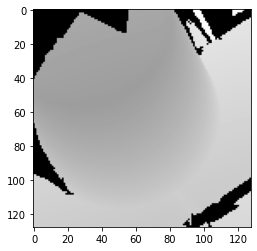

In [5]:
sample_depth_map_path = "/nfs/jolteon/data/ssd/vkvats/datasets/DTU/Depths/scan1_train/depth_map_0001.pfm"
image = read_pfm(sample_depth_map_path)
image = random_crop(image, 128, 128)
plt.imshow(normalize(image), cmap="gray")
plt.show()

In [6]:
tensorify = tvt.ToTensor()
image_torch = tensorify(normalize(image))
print(image_torch.shape)

torch.Size([1, 128, 128])


In [7]:
print(image_torch.max())

tensor(1., dtype=torch.float64)


In [8]:
# https://roboimagedata.compute.dtu.dk/?page_id=36

In [9]:
def image_tensor_to_numpy(image_tensor):
    return image_tensor.cpu().detach().numpy().transpose((1,2,0))

In [10]:
train_dataset = PatchedDatasetTensor("./train.csv")
x1, x2, x4, x8, x16 = train_dataset[20]

torch.Size([1, 32, 32])


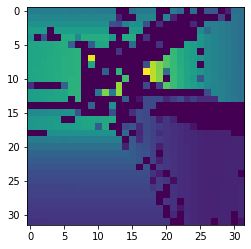

In [11]:
print(x1.shape)
plt.imshow(image_tensor_to_numpy(x1))

torch.Size([1, 64, 64])


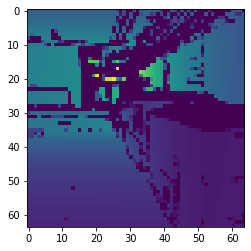

In [13]:
print(x2.shape)
plt.imshow(image_tensor_to_numpy(x2))

torch.Size([1, 128, 128])


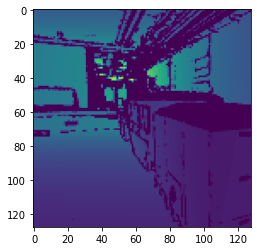

In [14]:
print(x4.shape)
plt.imshow(image_tensor_to_numpy(x4))

torch.Size([1, 256, 256])


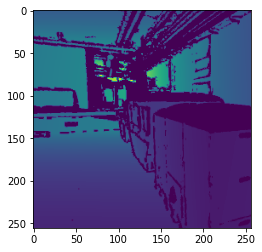

In [15]:
print(x8.shape)
plt.imshow(image_tensor_to_numpy(x8))

torch.Size([1, 512, 512])


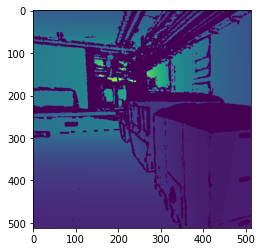

In [16]:
print(x16.shape)
plt.imshow(image_tensor_to_numpy(x16))